In [4]:
import pandas as pd

import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords, words
import re
from nltk.stem import WordNetLemmatizer


import string
from collections import Counter



In [5]:
responses = pd.read_csv(r'./Data/formresponses.csv')

In [6]:
records = responses.iloc[:, 1].dropna()


In [7]:
# Define the category words
category_words = ['community', 'town', 'small', 'people', 'college']
col1 = responses.iloc[:, 1].dropna()
responses1 = col1.tolist()


# responses['What are things that make you glad to live in Grinnell?  '].dropna()

# Create a dictionary to hold the categories and their corresponding responses
category_responses = {}
for word in category_words:
    category_responses[word] = []

# Loop over each response and assign it to the category with the highest count
for response in responses1:
    counts = {word: response.count(word) for word in category_words}
    max_count = max(counts.values())
    category = [word for word, count in counts.items() if count == max_count][0]
    category_responses[category].append(response)

# Print the category responses
for category, responses1 in category_responses.items():
    print(f'{category}:')
    for response in responses1:
        print(f' - {response}')
    print()


community:
 - Alexandria Minnesota - great summer vibe, lots of lakes, great natural resources, interesting history. Stable economy, stable politics, housing projects that are underway or soon to be, tree planting, and EMS finally being resolved.
 - Many small shops and restaurants where people gather outside and inside. Utilizes alleys for gatherings. Pet friendly bars and restaurants. Central Park kids playing in the water and events held in the park. Lost pet or lost mail/package found by posting on Hey Grinnell social media page and also the community input when disasters like power outages etc. keep everyone informed. Community gatherings like Music in the Park, Farmers Market, parades. 
 - Safety, high quality neighborhoods.
 - I don't live here but do work in the community.  Love the esthetics and the collaboration that seems to take place!
 - Friendly people. Grinnell Area Arts Council.  Good public school system. Pleasant well maintained public parks. Bicycle trails. Well main

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# extract the text data from the "text" column
text_data = records.values

# Download the stopwords and words from nltk
nltk.download('stopwords')
nltk.download('words')

# remove stop words
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
text_data = [" ".join([lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in stop_words]) for text in text_data]

    

#https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
#https://okan.cloud/posts/2022-01-16-text-vectorization-using-python-tf-idf/

# transform text data into numerical vector
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

#verify by summing all columns, and they should all equal to 1
df.to_csv("Tokenized.csv", sep = ',' )
print(df)


     100  1892  2010  2030   30   35   40  4th  52nd       80  ...  works  \
0    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
1    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
2    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.20757  ...    0.0   
3    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
4    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
..   ...   ...   ...   ...  ...  ...  ...  ...   ...      ...  ...    ...   
384  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
385  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
386  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
387  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   
388  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.00000  ...    0.0   

     world    would  written  year  years  you  your  youth  yrs  
0      0

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [22]:
lemmatizer.lemmatize("communities")

'community'

In [ ]:
# calculate the cosine similarity matrix
cosine_sim = cosine_similarity(vectors)

# cluster the data based on cosine similarity
kmeans = KMeans(n_clusters=5, random_state=0).fit(cosine_sim)

# Print the cluster labels for each response
labels = kmeans.labels_
for i, label in enumerate(labels):
    print(f"Response {i}: Cluster {label}")

Response 0: Cluster 2
Response 1: Cluster 2
Response 2: Cluster 2
Response 3: Cluster 0
Response 4: Cluster 2
Response 5: Cluster 2
Response 6: Cluster 2
Response 7: Cluster 4
Response 8: Cluster 3
Response 9: Cluster 3
Response 10: Cluster 0
Response 11: Cluster 2
Response 12: Cluster 2
Response 13: Cluster 2
Response 14: Cluster 2
Response 15: Cluster 2
Response 16: Cluster 2
Response 17: Cluster 2
Response 18: Cluster 2
Response 19: Cluster 3
Response 20: Cluster 2
Response 21: Cluster 0
Response 22: Cluster 2
Response 23: Cluster 2
Response 24: Cluster 3
Response 25: Cluster 2
Response 26: Cluster 2
Response 27: Cluster 2
Response 28: Cluster 2
Response 29: Cluster 2
Response 30: Cluster 2
Response 31: Cluster 3
Response 32: Cluster 2
Response 33: Cluster 2
Response 34: Cluster 1
Response 35: Cluster 2
Response 36: Cluster 0
Response 37: Cluster 2
Response 38: Cluster 0
Response 39: Cluster 2
Response 40: Cluster 2
Response 41: Cluster 2
Response 42: Cluster 2
Response 43: Cluster 

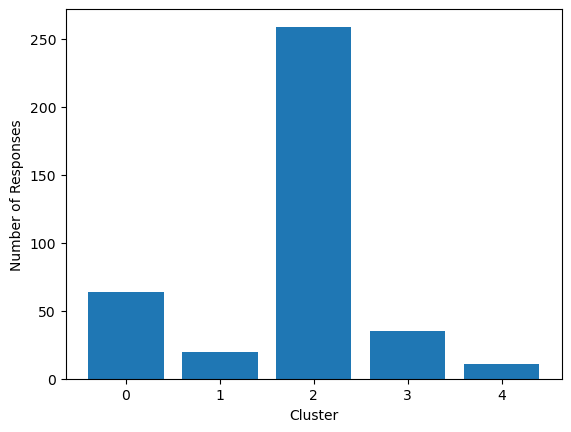

In [ ]:
import matplotlib.pyplot as plt

# Create histogram showing cluster sizes
cluster_sizes = [sum(labels == i) for i in range(kmeans.n_clusters)]
plt.bar(range(kmeans.n_clusters), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Responses')
plt.show()


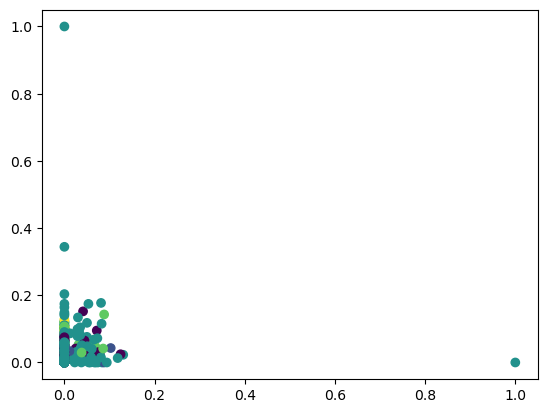

In [ ]:
import matplotlib.pyplot as plt

# visualize the clustering results
plt.scatter(cosine_sim[:, 0], cosine_sim[:, 1], c=kmeans.labels_)
plt.show()

#do pca to find axis. the derived dimensioin captures where there is maximal variation between data points
# dimension where there is most variation
# number of pca is the same as no. of variables

#get a rotation matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# calculate the pairwise distance matrix
distance_matrix = 1 - np.array(cosine_similarity(vectors))

# apply agglomerative clustering
Z = linkage(distance_matrix, method='ward')
labels = fcluster(Z, t=4, criterion='maxclust')

# print the cluster labels
print(labels)


[4 4 4 3 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 2 4 4
 4 3 4 4 4 4 4 4 4 4 4 4 2 4 4 3 4 3 3 3 4 4 1 4 4 3 3 1 4 4 4 3 4 3 4 3 3
 4 4 4 2 3 2 4 1 4 4 4 2 4 1 4 4 4 3 4 3 4 3 4 4 3 4 2 3 4 3 4 4 3 4 4 4 2
 4 3 3 3 4 3 3 4 3 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4
 4 4 1 4 4 2 4 4 4 4 4 4 3 4 4 4 3 3 4 3 4 2 3 4 4 1 4 2 4 4 4 4 4 4 4 4 3
 4 4 4 4 4 3 4 1 4 4 4 4 3 3 4 4 1 3 3 4 4 3 4 4 4 4 3 4 4 3 4 4 4 4 4 1 4
 4 4 2 4 4 4 4 3 4 4 3 4 3 4 4 2 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3
 4 4 2 4 4 3 3 3 4 2 4 3 3 3 4 3 4 3 4 4 4 4 4 2 4 1 4 1 2 1 4 3 4 3 4 4 3
 4 4 4 3 1 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 3 4 2 1 4
 4 3 2 4 4 4 4 2 4 2 3 2 3 4 4 2 4 4 4 3 4 4 3 4 4 4 4 3 4 4 4 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4]


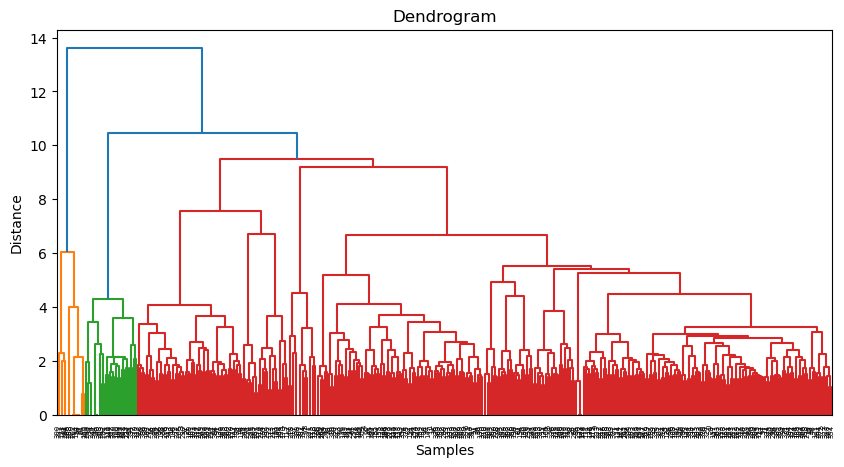

In [ ]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

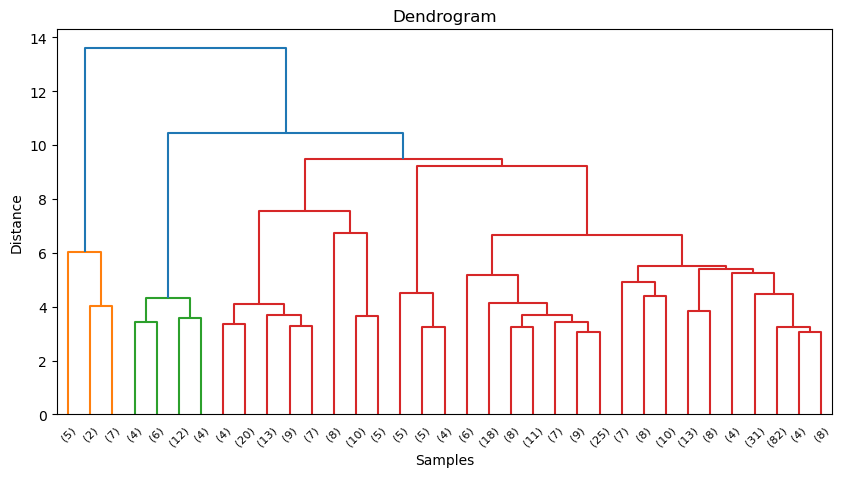

In [ ]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
#truncated to 35 responses
dn = dendrogram(Z, truncate_mode='lastp', p=35)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [ ]:
first = responses.iloc[:, 1].dropna().tolist()

# create a dictionary to store the responses in each cluster
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)

# print the responses in each cluster
for label, first in clusters.items():
    print(f"Cluster {label}:")
    print(first)
    print()

Cluster 4:
[0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 57, 58, 60, 61, 65, 66, 67, 69, 71, 74, 75, 76, 80, 82, 83, 84, 86, 88, 89, 90, 92, 94, 96, 97, 99, 102, 104, 105, 107, 108, 109, 111, 115, 118, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 166, 168, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195, 196, 199, 200, 204, 205, 207, 208, 209, 210, 212, 213, 215, 216, 217, 218, 219, 221, 222, 223, 225, 226, 227, 228, 230, 231, 233, 235, 236, 238, 239, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 259, 260, 262, 263, 267, 269, 273, 275, 277, 278, 279, 280, 281, 283, 285, 289, 291, 293, 294, 296, 297, 298, 301, 302, 303, 304, 305, 306, 307, 308, 309, 311, 3